In [19]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

y = y.astype(np.int8)

In [20]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (70000, 784)
Shape of y: (70000,)


Shape before reshaping: (784,)
Shape after reshaping: (28, 28)
Shape before reshaping: (784,)
Shape after reshaping: (28, 28)
Shape before reshaping: (784,)
Shape after reshaping: (28, 28)
Shape before reshaping: (784,)
Shape after reshaping: (28, 28)
Shape before reshaping: (784,)
Shape after reshaping: (28, 28)
Shape before reshaping: (784,)
Shape after reshaping: (28, 28)
Shape before reshaping: (784,)
Shape after reshaping: (28, 28)
Shape before reshaping: (784,)
Shape after reshaping: (28, 28)
Shape before reshaping: (784,)
Shape after reshaping: (28, 28)


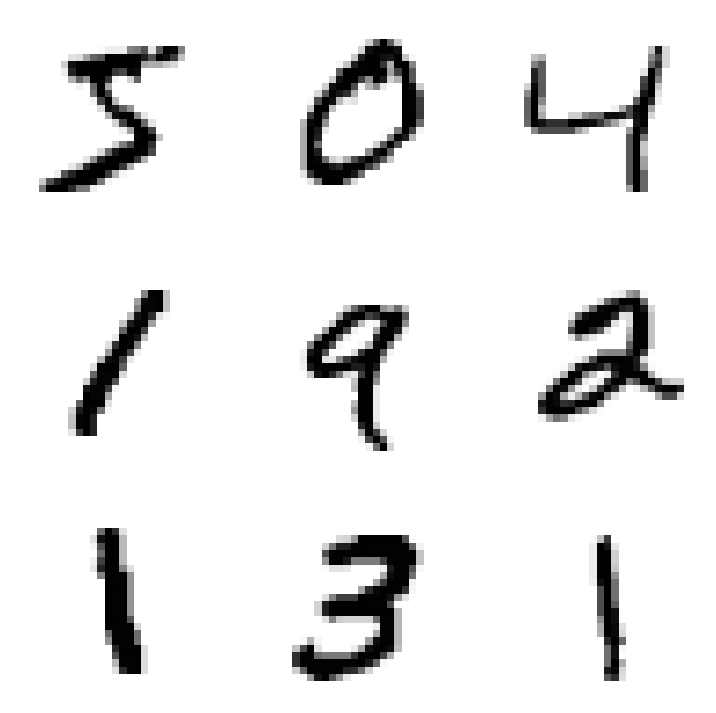

In [22]:
def plot_digit(data):
    print(f"Shape before reshaping: {data.shape}")
    image = data.reshape(28, 28)
    print(f"Shape after reshaping: {image.shape}")
    plt.imshow(image, cmap=plt.cm.binary, interpolation="nearest")
    plt.axis("off")
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plot_digit(X.iloc[i].values)
plt.show()

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.09746116 0.07155445]


In [24]:
def custom_pca(X, n_components):
    X_meaned = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_meaned, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]
    eigenvector_subset = sorted_eigenvectors[:, 0:n_components]
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
    
    return X_reduced, sorted_eigenvalues, sorted_eigenvectors

X_custom_pca, custom_eigenvalues, custom_eigenvectors = custom_pca(X, 2)

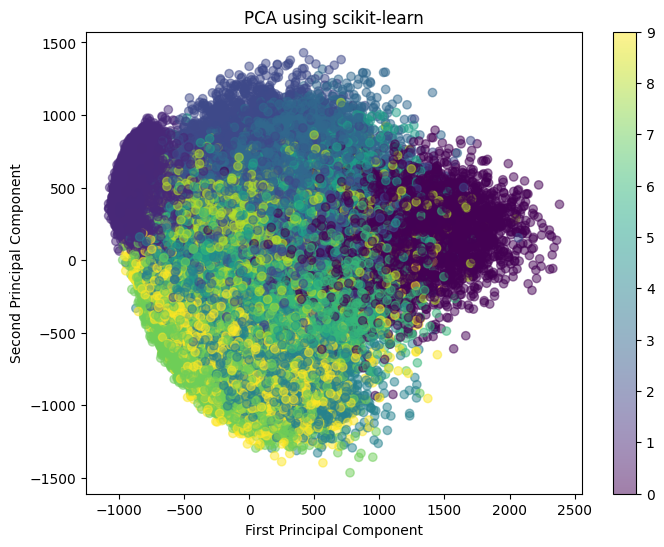

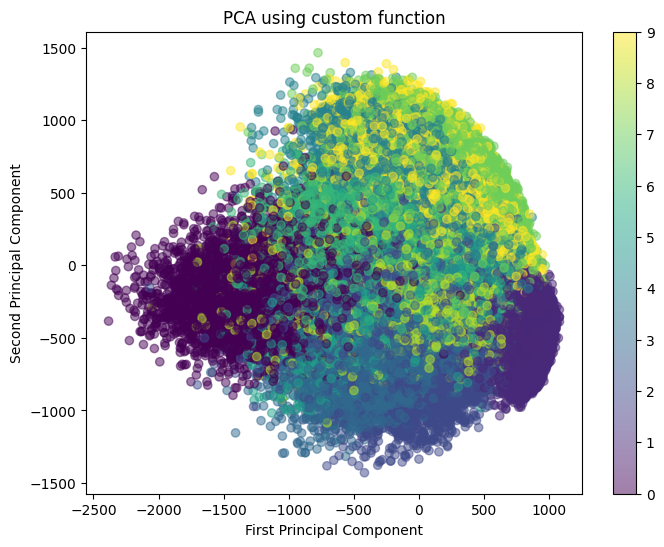

In [25]:
def plot_pca_components(X_pca, y, title):
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

plot_pca_components(X_pca, y, 'PCA using scikit-learn')

plot_pca_components(X_custom_pca, y, 'PCA using custom function')